# COVID-19 DASHBOARD

### Submitted By: Divyansh Purohit
#### Roll Number: 101903438
#### Group: 3COE17

#### Overview
This is a Covid-19 Dashboard. It displays the worldwide total confirmed cases, total recovered cases and the total deaths till date starting from 22nd of Januaury 2020. The datasets used in this project were prepared by John Hopekins University.

The users can get the counts of any country they select through the dropdown menu, and can adjust the graph using the slider.

This Dashboard is built using Dash, which is a framework for building web-based analytic applications and also provides pure Python abstraction around HTML, CSS, and JavaScript. This project relies on the dash_html_components library, the dash_bootstrap_components library and the dash_core_components library for built-in user interface elements.
The graph is plotted using the ploty library.

To run this app on local machine simply download this notebook and run all cells in order and visit localhost:8050 in your browser.

## There is a problem in the Recovered Dataset, the numbers are not correct

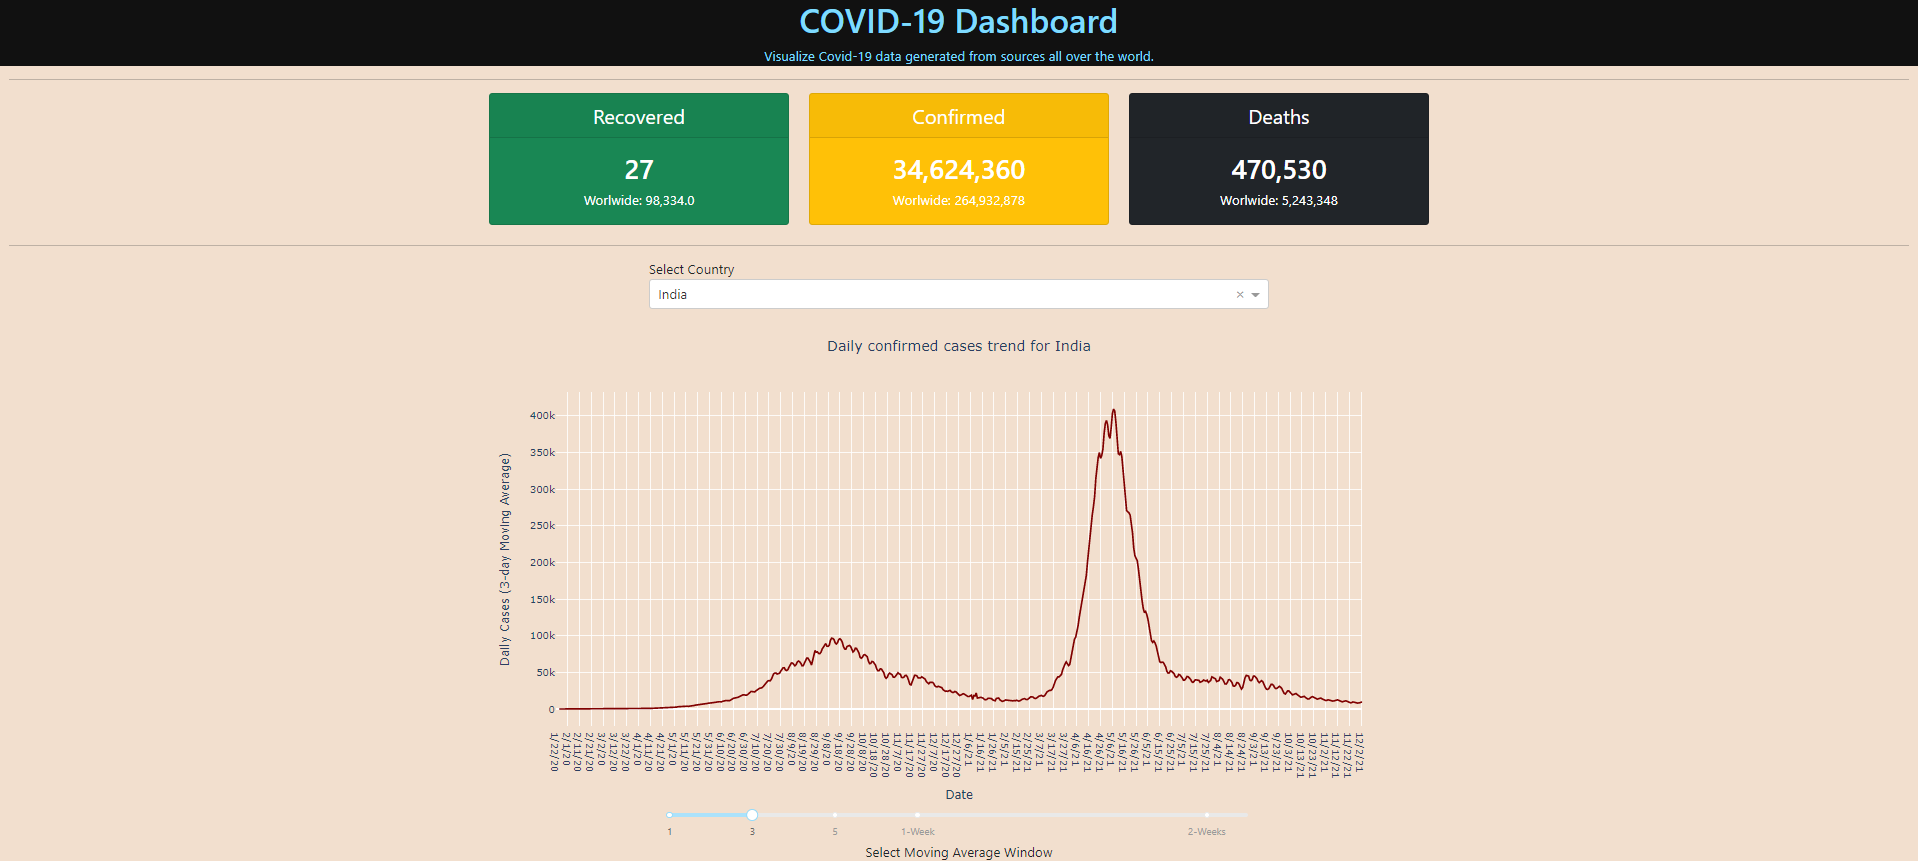


## Installing Dependencies

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install dash
# !pip install plotly
# !pip install dash_bootstrap_components

In [2]:
# Dash is an open-source Python, R, and Julia framework for building web-based analytic applications
# and also provides pure Python abstraction around HTML, CSS, and JavaScript.

# Dash-bootstrap-components is a library of Bootstrap components for Plotly Dash, that makes it easier to build 
# consistently styled apps with complex, responsive layouts.

# Plotly provides online graphing, analytics, and statistics tools. Its like front-end to ML and Data Science Models

## Importing Libraries

In [3]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import dash

In [4]:
# The plotly.express is a built-in module of the ploty library contains functions that can create entire figures at once,
# and is the recommended starting point for creating most common figures. It is referred to as Plotly Express or PX. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 

# plotly.io: Low-level interface for displaying, reading and writing figures.

In [5]:
from dash.dependencies import Input, Output
from dash import dcc
from dash import html
import dash_bootstrap_components as dbc

In [6]:
# dash-html-components library: Instead of writing HTML or using an HTML templating engine,
# we can compose our layout using Python structures with the dash-html-components library.

# dash-core-components library: For interactive user interfaces

In [7]:
pio.renderers.default="browser"
# renderers -> Singleton object containing the current renderer configurations

## Getting Data

In [8]:
#3 datasets used:
#conf_url = number of confirmed cases each day
#dead_url = number of deaths on each day
#recv_url = number of patients recovered on each day

#from 22nd Januaury, 2020 - (till date - 1)

In [9]:
CONF_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEAD_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECV_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Recovered_archived_0325.csv'
#RECV_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [10]:
covid_confirmed = pd.read_csv(CONF_URL)
#assigning aliases to shorten names
d1 = covid_confirmed

covid_dead = pd.read_csv(DEAD_URL)
#assigning aliases to shorten names
d2 = covid_dead

covid_recovered = pd.read_csv(RECV_URL)
#assigning aliases to shorten names
d3 = covid_recovered

## Processing Data

In [11]:
#get data in cleaned time series format for country
#default value for country is India, and window size is 3
def process_data(data,country="India",window=3):
    
    #making a copy of the dataframe, so any changes done inside this function do not update the original dataframe
    conf_ts = data
        
    #working with only those rows where the Country/Region series matches with the one passed
    conf_ts_country = conf_ts[conf_ts['Country/Region']==country]
    
    #taking the transpose of new dataframe and discarding first four rows as they only contain latitude, longitude, province, Region/Country data
    final_dataset = conf_ts_country.T[4:].sum(axis='columns').diff().rolling(window=window).mean()    
    df = pd.DataFrame(final_dataset,columns=['Total'])
    return df
#process_data function prepares a times series for a country and returns that as a dataframe

In [12]:
#get world-wide total for the requested data (which may be new confirmed, new deaths, or new recovered)
def get_world_total(df):
    
    #return the sum of (all the rows of) last column of the received dataframe, 
    #which holds the newly generated data for each day for each country.
    return df.iloc[:,-1].sum()

In [13]:
#Calling the function to get world-wide total of confirmed, dead, and recovered cases.
conf_overall_total = get_world_total(d1)
dead_overall_total = get_world_total(d2)
recv_overall_total = get_world_total(d3)

#printing the data received using format string
print('Overall Confirmed:',conf_overall_total)
print('Overall Dead:',dead_overall_total)
print('Overall Recovered:',recv_overall_total)

Overall Confirmed: 264932878
Overall Dead: 5243348
Overall Recovered: 98334.0


In [14]:
#get country-wise total for requested data (which may be new confirmed, new deaths, or new recovered)
#(default country = INDIA)
def get_country_wise_total(df,country='India'):
    
    #return the sum of only those rows of the last column of the received dataframe, 
    #where the value of 'Country/Region' field equals the passed country value.
    return df[df['Country/Region']==country].iloc[:,-1].sum()

In [15]:
# country = 'India'
# conf_country_total = get_country_wise_total(d1,country)
# dead_country_total = get_country_wise_total(d2,country)
# recv_country_total = get_country_wise_total(d3,country)

# #printing the data received using format string
# print(f'{country} Confirmed:',conf_country_total)
# print(f'{country} Dead:',dead_country_total)
# print(f'{country} Recovered:',recv_country_total)

In [16]:
#generates a plot for the new confirmed cases for a country
def fig_world_trend(country='India',window=3):
    
    df = process_data(data=d1,country=country,window=window)
    df.head(10)
    if window==1:
        yaxis_title = "Daily Cases"
    else:
        yaxis_title = "Daily Cases ({}-day Moving Average)".format(window)
        
    #plot a line chart of the dataframe returned from the process_data() function
    fig = px.line(df, y='Total', x=df.index, title='Daily confirmed cases trend for {}'.format(country),height=600,color_discrete_sequence =['maroon'])
    
    #updating the layout of the figure
    #centering the title,
    #setting background color,
    #setting paper background color,
    #labelling x and y axis
    fig.update_layout(title_x=0.5,plot_bgcolor='#F2DFCE',paper_bgcolor='#F2DFCE',xaxis_title="Date",yaxis_title=yaxis_title)
    
    #returning the fig ('Figure_Object') that will be used by the dash app
    return fig

In [17]:
fig_world_trend('India', 3)

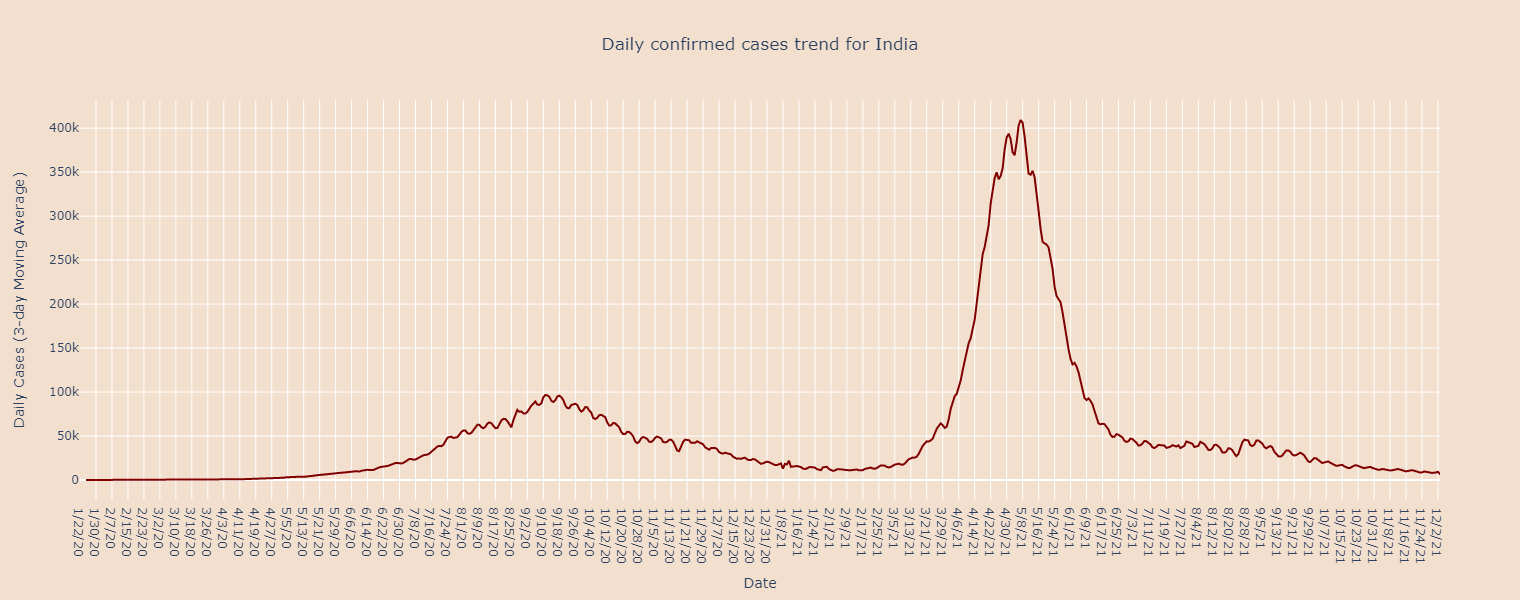

## Dashboard - Dash APP

In [18]:
#setting the external_stylesheets to dbc.themes.bootstrap
external_stylesheets = [dbc.themes.BOOTSTRAP]

#starting the dash app with external_stylesheet configured
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

#setting the app title to Covid-19-Dashboard
app.title = 'Covid-19 Dashboard'

## Page Header

In [19]:
#setting configurations for the pge headers
colors = {
    'background': '#111111',
    'bodyColor':'#F2DFCE',
    'text': '#7FDBFF'
}

def get_page_heading_style():
    return {'backgroundColor': colors['background']}

#using the dash_html_component library for generating the content of the page with the specified styles applied.
#children => content of the html element
#style => dictionary with specified styles
def get_page_heading_title():
    return html.H1(children='COVID-19 Dashboard',
                                        style={
                                        'textAlign': 'center',
                                        'color': colors['text']
                                    })

#using the dash_html_component library for generating the content of the page with the specified styles applied.
#children => content of the html element
#style => dictionary with specified styles
def get_page_heading_subtitle():
    return html.Div(children='Visualize Covid-19 data generated from sources all over the world.',
                                         style={
                                             'textAlign':'center',
                                             'color':colors['text']
                                         })

#using the dash_bootstrap_component library for generating the styled html elements.
def generate_page_header():
    main_header =  dbc.Row(
                            [
                                dbc.Col(get_page_heading_title(),md=12)
                            ],
                            align="center",
                            style=get_page_heading_style()
                        )
    subtitle_header = dbc.Row(
                            [
                                dbc.Col(get_page_heading_subtitle(),md=12)
                            ],
                            align="center",
                            style=get_page_heading_style()
                        )
    header = (main_header,subtitle_header)
    
    #returning multiple content from generate_page-header()
    return header

## 'Select Country' Dropdown

In [20]:
def get_country_list():
    
    #function that returns the unique countries in the dataframe received
    return d1['Country/Region'].unique()

def create_dropdown_list(country_list):
    
    #function that generates a dropdown list of unique countries in sorted order
    dropdown_list = []
    
    for country in sorted(country_list):
        tmp_dict = {'label':country,'value':country}
        dropdown_list.append(tmp_dict)
        
    #dropdown_list is an array(list) of dictionary(key-value) pairs, 
    #where each pair is a mapping of the country label to its value
    return dropdown_list

def get_country_dropdown(id):
    
    #function to render the dropdown on the screen using the dash_core_components library
    return html.Div([
                        html.Label('Select Country'),
                        
                        #we are not creating the dropdown from scratch, but leveraging the dash_core_component library's
                        #built in 'Dropdown' component, just passing the list of unique countries and a default value.
                        dcc.Dropdown(id='my-id'+str(id),
                            options=create_dropdown_list(get_country_list()),
                            value='India'
                        ),
                        #id field is set so that the user input on this element can be collected by referencing to its id
                        html.Div(id='my-div'+str(id))
                    ])

## Displaying Graph

In [21]:
def graph1():

    #function that creates a container to hold the graph(line chart) generated by the fig_world_trend() function
    #so that it can be put up on our dashboard
    
    return dcc.Graph(id='graph1',figure=fig_world_trend('India'))

## 'Card' Component for Overall Numbers

In [22]:
def generate_card_content(card_header,card_value,overall_value):
    
    #function that creates the card content for our three cards namely confirmed, deaths, and recovered
    
    #defining styles for the card
    card_head_style = {'textAlign':'center','fontSize':'150%'}
    card_body_style = {'textAlign':'center','fontSize':'200%'}
    
    #leveraging the dbc.CardHeader and dbc.CardBody for some predefined styles.
    card_header = dbc.CardHeader(card_header,style=card_head_style)
    card_body = dbc.CardBody(
        [
            #defining the contents of the card body using dash_html
            html.H5(f"{int(card_value):,}", className="card-title",style=card_body_style),
            html.P(
                "Worlwide: {:,}".format(overall_value),
                className="card-text",style={'textAlign':'center'}
            ),
        ]
    )
    card = [card_header,card_body]
    
    #returning the card as a whole
    return card


In [23]:
def generate_cards(country='India'):
    
    #generating three cards for confirmed cases, deaths, recovered cases respectively
    conf_country_total = get_country_wise_total(d1,country)
    dead_country_total = get_country_wise_total(d2,country)
    recv_country_total = get_country_wise_total(d3,country)
    
    #displaying the three cards inside an html DIV in three columns side by side 
    cards = html.Div(
        [
            dbc.Row(
                [
                    #Leveraging inbuilt dbc color classes like success, warning, and dark
                    dbc.Col(dbc.Card(generate_card_content("Recovered",recv_country_total,recv_overall_total), color="success", inverse=True),md=dict(size=2,offset=3)),
                    dbc.Col(dbc.Card(generate_card_content("Confirmed",conf_country_total,conf_overall_total), color="warning", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Deaths",dead_country_total,dead_overall_total),color="dark", inverse=True),md=dict(size=2)),                                        
                ],
                className="mb-4",
            ),
        ],id='card1'
    )
    
    #returning the div so that it can be used at a later stage
    return cards

## 'Slider' Component

In [24]:
def get_slider():
    
    #returning a slider so that the user can adjust the graph according to his needs
    return html.Div([  
                        #using inbuilt dash_core_component library's Slider component with some configurations
                        dcc.Slider(
                            id='my-slider',
                            min=1,
                            max=15,
                            step=None,
                            marks={
                                1: '1',
                                3: '3',
                                5: '5',
                                7: '1-Week',
                                14: '2-Weeks'
                            },
                            value=3,
                        ),
                        
                        #id field is set so that the user input on this element can be collected by referencing to its id
                        html.Div([html.Label('Select Moving Average Window')],id='my-div'+str(id),style={'textAlign':'center'})
                    ])

## Displaying all the Components on the Screen

In [25]:
def generate_layout():
    
    #functions that collects all the defined html and dash-core-components defined above and displays them on the screen,
    #in order in which they are called below, when invoked
    
    page_header = generate_page_header()
    layout = dbc.Container(
        [
            page_header[0],
            page_header[1],
            html.Hr(),
            generate_cards(),
            html.Hr(),
            dbc.Row(
                [
                    dbc.Col(get_country_dropdown(id=1),md=dict(size=4,offset=4))                    
                ]
            
            ),
            dbc.Row(
                [                
                    
                    dbc.Col(graph1(),md=dict(size=6,offset=3))
        
                ],
                align="center",

            ),
            dbc.Row(
                [
                    dbc.Col(get_slider(),md=dict(size=4,offset=4))                    
                ]
            
            ),
        ],fluid=True,style={'backgroundColor': colors['bodyColor']}
    )
    return layout

In [26]:
#invoking the above function
app.layout = generate_layout()

## Defining the Callback Components to deal with the Dynamic and Changing User Input

In [27]:
@app.callback(
    [Output(component_id='graph1',component_property='figure'), #line chart
    Output(component_id='card1',component_property='children')], #overall card numbers
    
    #collecting the changed user input
    [Input(component_id='my-id1',component_property='value'), #dropdown
     Input(component_id='my-slider',component_property='value')] #slider
)
def update_output_div(input_value1,input_value2):
    
    #function that triggers the change in displayed content based on the user input
    return fig_world_trend(input_value1,input_value2),generate_cards(input_value1)

In [ ]:
app.run_server(host= '0.0.0.0',debug=False)

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Dec/2021 13:58:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:12] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:12] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:12] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:13] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:13] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:13] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:13] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Dec/2021 13:58:30] "POST /_dash-updat